In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(56.28804181676645, 105.55674800669192),
 (47.859696427534914, 58.88178445800645),
 (-56.15839185301403, 14.185066186509005),
 (71.55810767022987, 15.372319192462925),
 (13.359165987316302, -154.17929459458963),
 (-15.086461417321388, -32.071790568251544),
 (-80.21649762910843, 116.17832107943377),
 (-85.08841606669789, -99.0843552488305),
 (-64.94622315772739, -146.613940811799),
 (-12.671796665228769, 83.74519544218845),
 (16.389683666001403, 148.57403471139537),
 (-87.8995151908932, -129.8226644918018),
 (-30.24037428245873, -124.19857566183833),
 (84.12843884738479, -113.38364127260041),
 (-21.405874274444642, 173.74180319041284),
 (78.80331450141603, 139.5956744084894),
 (-0.5846879766414617, -31.005719948199868),
 (88.7347147092629, -109.34924953661091),
 (-25.486445806867394, 13.179571542216536),
 (-31.787824349740276, 57.391060826861036),
 (-31.872328200866228, -31.094179981251614),
 (78.33250890200446, -135.89949050001806),
 (-13.824645896086395, 142.44075877947188),
 (65.142

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 12 | ust-kut
Processing Record 2 of Set 12 | emba
Processing Record 3 of Set 12 | hermanus
Processing Record 4 of Set 12 | andenes
Processing Record 5 of Set 12 | hilo
Processing Record 6 of Set 12 | piacabucu
Processing Record 7 of Set 12 | albany
Processing Record 8 of Set 12 | punta arenas
Processing Record 9 of Set 12 | mataura
Processing Record 10 of Set 12 | hithadhoo
Processing Record 11 of Set 12 | airai
Processing Record 12 of Set 12 | rikitea
Processing Record 13 of Set 12 | yellowknife
Processing Record 14 of Set 12 | isangel
Processing Record 15 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 12 | touros
Processing Record 17 of Set 12 | luderitz
Processing Record 18 of Set 12 | saint-philippe
Processing Record 19 of Set 12 | arraial do cabo
Processing Record 20 of Set 12 | tuktoyaktuk
Processing Record 21 of Set 12 | mareeba
Processing Record 22 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 

Processing Record 35 of Set 15 | wanaka
Processing Record 36 of Set 15 | tasiilaq
Processing Record 37 of Set 15 | escuinapa
Processing Record 38 of Set 15 | mahina
Processing Record 39 of Set 15 | samusu
City not found. Skipping...
Processing Record 40 of Set 15 | sylva
Processing Record 41 of Set 15 | ponta delgada
Processing Record 42 of Set 15 | kaitangata
Processing Record 43 of Set 15 | tubmanburg
Processing Record 44 of Set 15 | gustrow
Processing Record 45 of Set 15 | port lincoln
Processing Record 46 of Set 15 | kawalu
Processing Record 47 of Set 15 | ornskoldsvik
Processing Record 48 of Set 15 | kotelnikovo
Processing Record 49 of Set 15 | mys shmidta
City not found. Skipping...
Processing Record 50 of Set 15 | visby
Processing Record 1 of Set 16 | halalo
City not found. Skipping...
Processing Record 2 of Set 16 | strezhevoy
Processing Record 3 of Set 16 | sitka
Processing Record 4 of Set 16 | beringovskiy
Processing Record 5 of Set 16 | imbituba
Processing Record 6 of Set 16

Processing Record 18 of Set 19 | yuzhnouralsk
Processing Record 19 of Set 19 | shubarkuduk
Processing Record 20 of Set 19 | egvekinot
Processing Record 21 of Set 19 | hamilton
Processing Record 22 of Set 19 | cherskiy
Processing Record 23 of Set 19 | akyab
Processing Record 24 of Set 19 | morros
Processing Record 25 of Set 19 | umm lajj
Processing Record 26 of Set 19 | padang
Processing Record 27 of Set 19 | dakar
Processing Record 28 of Set 19 | puerto escondido
Processing Record 29 of Set 19 | maryville
Processing Record 30 of Set 19 | severo-kurilsk
Processing Record 31 of Set 19 | esmeralda
Processing Record 32 of Set 19 | meulaboh
Processing Record 33 of Set 19 | burns lake
Processing Record 34 of Set 19 | santa cruz
Processing Record 35 of Set 19 | la reforma
Processing Record 36 of Set 19 | wankaner
Processing Record 37 of Set 19 | wenling
Processing Record 38 of Set 19 | sinjar
Processing Record 39 of Set 19 | raudeberg
Processing Record 40 of Set 19 | khorixas
Processing Recor

Processing Record 2 of Set 23 | saint john
Processing Record 3 of Set 23 | praia
Processing Record 4 of Set 23 | kranidion
City not found. Skipping...
Processing Record 5 of Set 23 | dingle
Processing Record 6 of Set 23 | puri
Processing Record 7 of Set 23 | pandan
Processing Record 8 of Set 23 | lavrentiya
Processing Record 9 of Set 23 | atambua
Processing Record 10 of Set 23 | ouadda
Processing Record 11 of Set 23 | graaff-reinet
Processing Record 12 of Set 23 | terrace
Processing Record 13 of Set 23 | margate
Processing Record 14 of Set 23 | iqaluit
Processing Record 15 of Set 23 | havelock
Processing Record 16 of Set 23 | pafos
Processing Record 17 of Set 23 | taoudenni
Processing Record 18 of Set 23 | bridlington
Processing Record 19 of Set 23 | sembe
Processing Record 20 of Set 23 | madimba
Processing Record 21 of Set 23 | mazamari
Processing Record 22 of Set 23 | longyan
Processing Record 23 of Set 23 | hailin
Processing Record 24 of Set 23 | nilakkottai
Processing Record 25 of 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ust-Kut,56.7938,105.7672,56.39,98,28,3.40,RU,2021-07-30 21:05:24
1,Emba,48.8264,58.1442,78.66,23,7,6.76,KZ,2021-07-30 21:05:24
2,Hermanus,-34.4187,19.2345,53.91,85,1,4.81,ZA,2021-07-30 21:05:25
3,Andenes,69.3143,16.1194,49.06,93,75,28.77,NO,2021-07-30 21:05:25
4,Hilo,19.7297,-155.0900,83.93,64,40,11.50,US,2021-07-30 21:05:26
5,Piacabucu,-10.4056,-36.4344,73.92,80,0,7.67,BR,2021-07-30 20:59:27
6,Albany,42.6001,-73.9662,75.16,53,32,8.99,US,2021-07-30 20:56:15
7,Punta Arenas,-53.1500,-70.9167,39.31,70,20,21.85,CL,2021-07-30 20:55:08
8,Mataura,-46.1927,168.8643,48.47,99,100,1.68,NZ,2021-07-30 20:56:16
9,Hithadhoo,-0.6000,73.0833,81.52,75,90,5.46,MV,2021-07-30 20:56:35


In [11]:
city_data_reordered = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']  
city_data_df = city_data_df[city_data_reordered] 
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ust-Kut,RU,2021-07-30 21:05:24,56.7938,105.7672,56.39,98,28,3.40
1,Emba,KZ,2021-07-30 21:05:24,48.8264,58.1442,78.66,23,7,6.76
2,Hermanus,ZA,2021-07-30 21:05:25,-34.4187,19.2345,53.91,85,1,4.81
3,Andenes,NO,2021-07-30 21:05:25,69.3143,16.1194,49.06,93,75,28.77
4,Hilo,US,2021-07-30 21:05:26,19.7297,-155.0900,83.93,64,40,11.50
5,Piacabucu,BR,2021-07-30 20:59:27,-10.4056,-36.4344,73.92,80,0,7.67
6,Albany,US,2021-07-30 20:56:15,42.6001,-73.9662,75.16,53,32,8.99
7,Punta Arenas,CL,2021-07-30 20:55:08,-53.1500,-70.9167,39.31,70,20,21.85
8,Mataura,NZ,2021-07-30 20:56:16,-46.1927,168.8643,48.47,99,100,1.68
9,Hithadhoo,MV,2021-07-30 20:56:35,-0.6000,73.0833,81.52,75,90,5.46


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

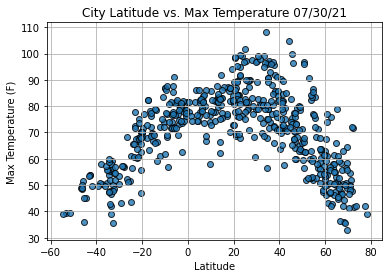

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

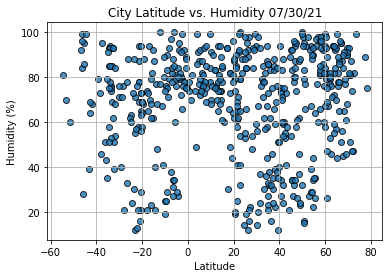

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

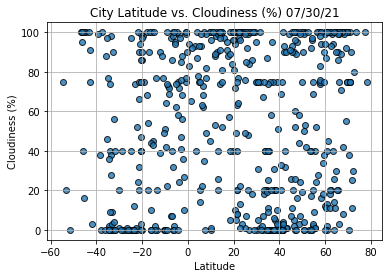

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

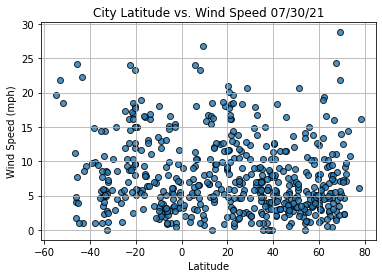

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
index13 = city_data_df.loc[13]
index13.head

<bound method NDFrame.head of City                      Isangel
Country                        VU
Date          2021-07-30 20:57:48
Lat                        -19.55
Lng                      169.2667
Max Temp                    71.71
Humidity                       68
Cloudiness                     98
Wind Speed                  14.97
Name: 13, dtype: object>

In [31]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
534    False
535    False
536     True
537     True
538     True
Name: Lat, Length: 539, dtype: bool

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ust-Kut,RU,2021-07-30 21:05:24,56.7938,105.7672,56.39,98,28,3.40
1,Emba,KZ,2021-07-30 21:05:24,48.8264,58.1442,78.66,23,7,6.76
3,Andenes,NO,2021-07-30 21:05:25,69.3143,16.1194,49.06,93,75,28.77
4,Hilo,US,2021-07-30 21:05:26,19.7297,-155.0900,83.93,64,40,11.50
6,Albany,US,2021-07-30 20:56:15,42.6001,-73.9662,75.16,53,32,8.99


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


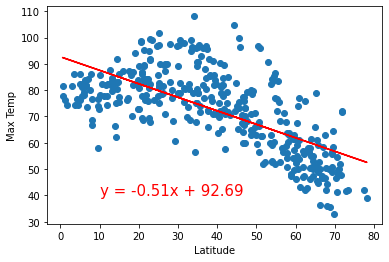

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

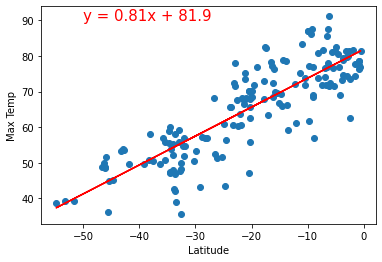

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

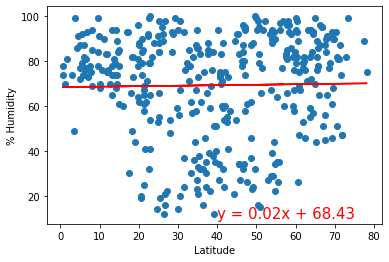

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

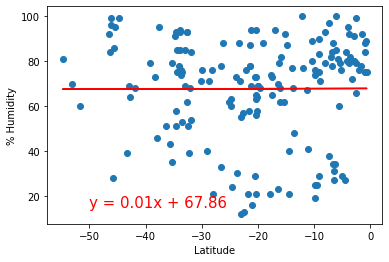

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

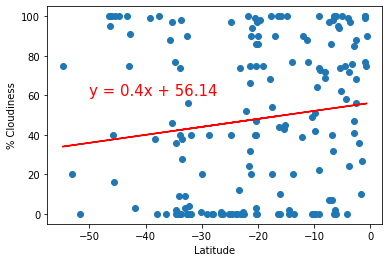

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


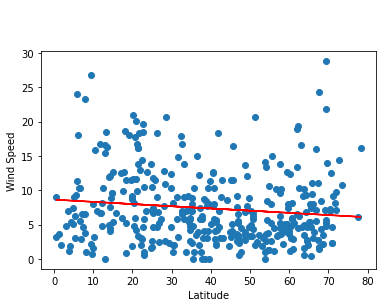

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

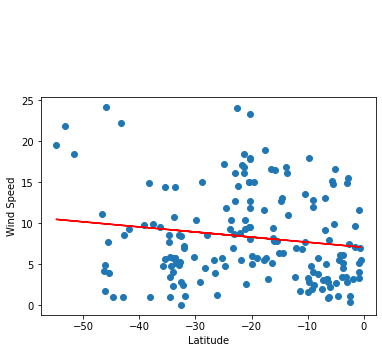

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
